In [2]:
import os
import re
import cv2
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
# Define the path to your image folder
path_image = "../data/external/Coral_images/Test/images"

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through each image file in the image folder
for image_filename in os.listdir(path_image):
    if image_filename.lower().endswith((".jpg", ".JPG")):  # Check for image files with .jpg or .JPG extensions
        image_path = os.path.join(path_image, image_filename)

        # Load the image using OpenCV
        image = cv2.imread(image_path)

        # Check if the image was loaded successfully
        if image is not None:
            # Resize the image to 224x224 if needed
            if image.shape[0] >= 224 and image.shape[1] >= 224:
                image = cv2.resize(image, (224, 224))
            else:
                print(f"Image dimensions are too small for resizing: {image_path}")

            # Convert the image to RGB color space
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Extract the label from the image file name (excluding the numeric part)
            match = re.match(r"([A-Za-z]+)", os.path.splitext(image_filename)[0])
            if match:
                label = match.group(1)
                # Append the image and label to the lists
                images.append(image_rgb)
                labels.append(label)
            else:
                # Handle cases where there's no match for the label
                print(f"No alphabetic characters found in image file name: {image_filename}")

# Convert the lists to NumPy arrays
images2 = np.array(images)
labels2 = np.array(labels)

# Now, check the shapes and class distribution
print(f"Images shape: {images2.shape}")
print(f"Labels shape: {labels2.shape}")

# Check class distribution
unique_labels, class_counts = np.unique(labels2, return_counts=True)
for label, count in zip(unique_labels, class_counts):
    print(f"Class: {label}, Count: {count}")


Images shape: (51, 224, 224, 3)
Labels shape: (51,)
Class: APAL, Count: 25
Class: Pseudodiploria, Count: 26


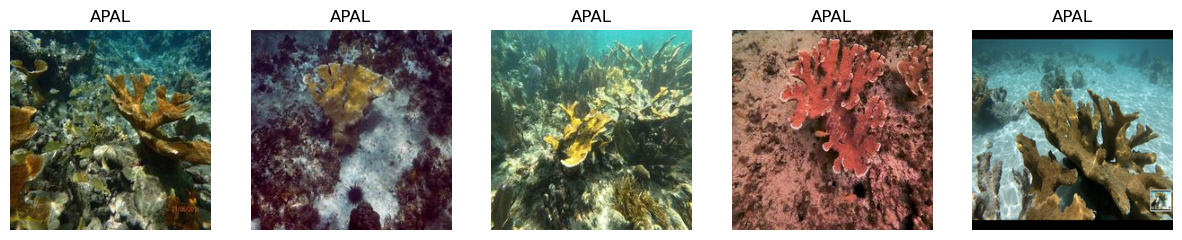

In [4]:
import matplotlib.pyplot as plt

# Define the number of samples to display
num_samples_to_display = 5

# Create subplots to display the images
plt.figure(figsize=(15, 5))

for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(images2[i])
    plt.title(labels2[i])
    plt.axis("off")

plt.show()

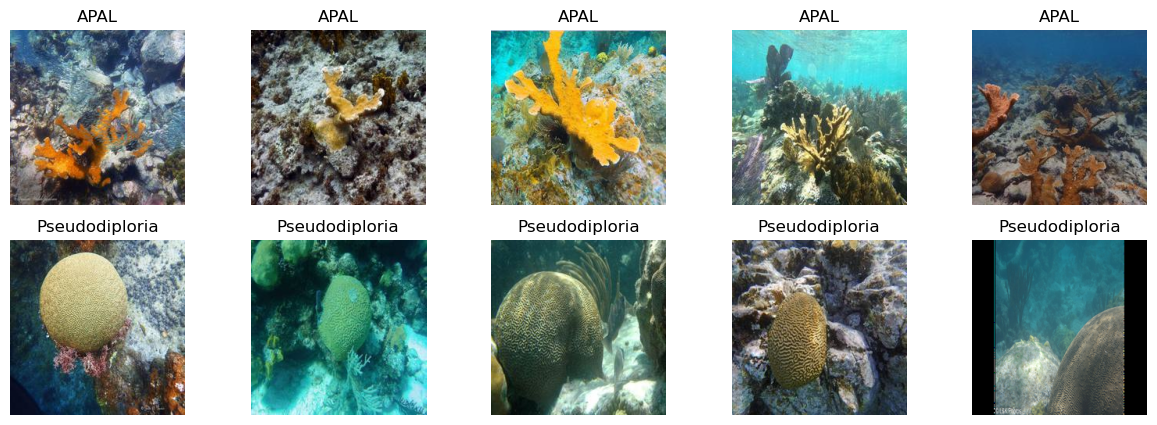

In [5]:
# Define the number of samples to display from each class
num_samples_per_class = 5

# Create subplots to display the images
plt.figure(figsize=(15, 5))

for i, label in enumerate(unique_labels):
    class_indices = np.where(labels2 == label)[0]
    sample_indices = np.random.choice(class_indices, num_samples_per_class, replace=False)

    for j, idx in enumerate(sample_indices):
        plt.subplot(len(unique_labels), num_samples_per_class, i * num_samples_per_class + j + 1)
        plt.imshow(images2[idx])
        plt.title(labels2[idx])
        plt.axis("off")

plt.show()

In [6]:
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(images2, labels2, test_size=0.2, random_state=42)

# # Split the training data into training and validation sets
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Print the shapes to verify
# print(f"X_train shape: {X_train.shape}")
# print(f"y_train shape: {y_train.shape}")
# print(f"X_valid shape: {X_valid.shape}")
# print(f"y_valid shape: {y_valid.shape}")
# print(f"X_test shape: {X_test.shape}")
# print(f"y_test shape: {y_test.shape}")


In [9]:
X_test = images2
y_test = labels2
# Save your data to a pickle file
with open('../data/external/data_test.pkl', 'wb') as f:
    pickle.dump((X_test, y_test), f)